# Downside

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import risk1 as r
import matplotlib.pyplot as plt
import seaborn as sns


# SemiDeviation 

In [2]:
df = r.get_hfi_returns()

c:\Users\Sumeet Maheshwari\Desktop\end to end project\Portfolio_Construction_python\risk1.py:38: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\data dump\VweKqLJfEemJ1w4LYV5qDg_2c089d97f24e49daa70b757b8337a76f_data (1)\data\edhec-hedgefundindices.csv",


In [3]:
df.std(ddof= 0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [4]:
r.semideviation(df)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR and CVaR
VaR = Value at Risk
- Historic VaR
- parameteric VaR - Gaussian
- Modified Cornish - Fisher VaR 


In [5]:
np.percentile(df, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [6]:
def var_historic(r, level = 5):
    """
    VaR historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic,level = level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise Exception("Expected r to be a Series or Dataframe")
    

In [7]:
var_historic(df)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [8]:
from scipy.stats import norm


In [11]:
z = norm.ppf(0.05)

In [12]:
z

-1.6448536269514729

In [14]:
abs(df.mean() + z*df.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [16]:
r.var_gaussian(df)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

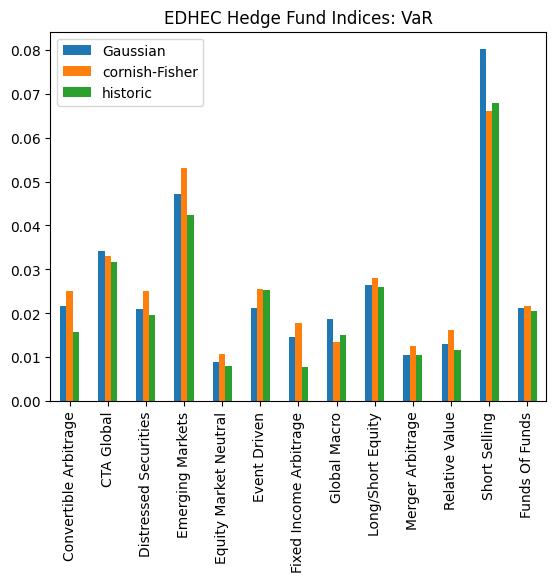

In [19]:
var_list = [r.var_gaussian(df), r.var_gaussian(df, modified = True), r.var_historic(df)]
r.plot_var_comparision(var_list)

In [21]:
r.cvar_historic(df)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64